# intro:
    
- ***This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The dataset is pretty unbalanced with wide range of houses information that are built and renovated from the year 1990 to 2015.***

- ***The goal is to predict the price category of a house that a realtor can charge, or a customer can invest to buy a house by considering multiple input factors.***

- ***id: This is unique identification number given to each house in the dataset.***

- ***date: This is the date the house is added into the dataset and is in the format YYYY-MM-DD.***

- ***price: (Numerical) Price of each house in US dollars.***

- ***bedrooms: (Numerical) Number of bed rooms available in each house and the dataset has houses having number of - -bedrooms ranging from 0 to 33.***

- ***bathrooms: (Numerical) Number of bed rooms available in each house and the dataset has houses having number of bedrooms ranging from 0 to 8.***

- ***sqft_living: (Numerical) Area size of living room in square feet.***

- ***sqft_lot: (Numerical) Total area of size of lot in square feet.***

- ***floors: (Numerical) Number of floors available in house.***

- ***waterfront: (Boolean 0/1) This is an indicator if the house is located on or beside a lake or beach. Possible values are 0 – indicating No and 1 – indicating Yes.***

- ***view: (Numerical) Rating of view of city or lake or beach from house and is rated from 0 to 5.***

- ***condition: (Numerical) Overall condition of house rated in the range 1 to 5.***

- ***grade: (Numerical) Overall grade of house ranging from 1 to 12.***

- ***sqft_above: (Numerical) The surface area of house in square feet above ground level.***

- ***sqft_basement: (Numerical) The surface area of house in square feet below ground level or basement.***

- ***yr_built: (Numerical) The year of house in which it is constructed.***

- ***yr_renovated: (Numerical) Year in which house is renovated or remodeled.***

- ***zipcode: (Categorical) It is a 5 digit zip code in which the house is located.***

- ***lat: (Numerical) Geographical Latitude position of the house.***

- ***long: (Numerical) Geographical longitude position of the house.***

- ***sqft_living15: (Numerical) It is the average house square footage of the 15 closest houses.***

- ***sqft_lot15: (Numerical) It is the average lot square footage of the 15 closest houses.***

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install pydotplus
!pip install numpy
!pip install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import pydotplus


In [151]:
df = pd.read_csv('housing2.csv')
df.head()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,1,3.0,1.00,1180,5650.0,1.0,0,0.0,...,7,1180.0,0.0,1955,0.0,98178,47.467850,-118.442548,1340.0,5650
1,6.414100e+09,20141209T000000,3,3.0,2.25,2570,7242.0,2.0,0,0.0,...,7,2170.0,400.0,1951,1991.0,98125,47.739287,-118.556787,1690.0,7639
2,5.631500e+09,20150225T000000,1,2.0,1.00,770,10000.0,1.0,0,0.0,...,6,770.0,0.0,1933,0.0,98028,47.576516,-119.427920,2720.0,8062
3,2.487201e+09,20141209T000000,4,4.0,3.00,1960,5000.0,1.0,0,0.0,...,7,1050.0,910.0,1965,NaN,98136,47.520418,-118.599666,1360.0,5000
4,1.954401e+09,20150218T000000,3,3.0,2.00,1680,8080.0,1.0,0,0.0,...,8,1680.0,0.0,1987,0.0,98074,47.717942,-118.418335,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.630000e+08,20140521T000000,2,3.0,2.50,1530,1131.0,3.0,0,0.0,...,8,1530.0,0.0,2009,0.0,98103,47.843378,-117.969003,1530.0,1509
21609,6.600060e+09,20150223T000000,3,4.0,2.50,2310,5813.0,2.0,0,0.0,...,8,2310.0,0.0,2014,0.0,98146,47.748003,-117.697733,1830.0,7200
21610,1.523300e+09,20140623T000000,3,2.0,0.75,1020,1350.0,2.0,0,0.0,...,7,1020.0,0.0,2009,0.0,98144,47.244265,-118.015665,1020.0,2007
21611,2.913101e+08,20150116T000000,3,3.0,2.50,1600,2388.0,2.0,0,0.0,...,8,1600.0,0.0,2004,0.0,98027,47.561359,-117.640371,1410.0,1287


In [152]:
df.shape

(21613, 21)

***The size of the dataset is bulit from 21 columns and 21613 rows***

In [153]:
df = df.drop(['id'], axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,1,3.0,1.00,1180,5650.0,1.0,0,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.467850,-118.442548,1340.0,5650
1,20141209T000000,3,3.0,2.25,2570,7242.0,2.0,0,0.0,3,7,2170.0,400.0,1951,1991.0,98125,47.739287,-118.556787,1690.0,7639
2,20150225T000000,1,2.0,1.00,770,10000.0,1.0,0,0.0,3,6,770.0,0.0,1933,0.0,98028,47.576516,-119.427920,2720.0,8062
3,20141209T000000,4,4.0,3.00,1960,5000.0,1.0,0,0.0,5,7,1050.0,910.0,1965,NaN,98136,47.520418,-118.599666,1360.0,5000
4,20150218T000000,3,3.0,2.00,1680,8080.0,1.0,0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.717942,-118.418335,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,2,3.0,2.50,1530,1131.0,3.0,0,0.0,3,8,1530.0,0.0,2009,0.0,98103,47.843378,-117.969003,1530.0,1509
21609,20150223T000000,3,4.0,2.50,2310,5813.0,2.0,0,0.0,3,8,2310.0,0.0,2014,0.0,98146,47.748003,-117.697733,1830.0,7200
21610,20140623T000000,3,2.0,0.75,1020,1350.0,2.0,0,0.0,3,7,1020.0,0.0,2009,0.0,98144,47.244265,-118.015665,1020.0,2007
21611,20150116T000000,3,3.0,2.50,1600,2388.0,2.0,0,0.0,3,8,1600.0,0.0,2004,0.0,98027,47.561359,-117.640371,1410.0,1287


***I have decided to replace the id format to acsending numbers from 1. 
The reason I decided to replace them is because there are more than 2000 id's missing in the dataset.***

In [155]:
df['yr_built/renovated'] = np.fmax(df.yr_renovated, df.yr_built)
df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'yr_renovated'

***The reason i decided to merge between the two features is because they are related to the price of the house and 
now i can get the information as if the price will be priced by the the date of creation or renovation.***

In [156]:
df = df.drop(['date'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built/renovated
0,1,3.0,1.00,1180,5650.0,1.0,0,0.0,3,7,1180.0,0.0,98178,47.467850,-118.442548,1340.0,5650,1955.0
1,3,3.0,2.25,2570,7242.0,2.0,0,0.0,3,7,2170.0,400.0,98125,47.739287,-118.556787,1690.0,7639,1991.0
2,1,2.0,1.00,770,10000.0,1.0,0,0.0,3,6,770.0,0.0,98028,47.576516,-119.427920,2720.0,8062,1933.0
3,4,4.0,3.00,1960,5000.0,1.0,0,0.0,5,7,1050.0,910.0,98136,47.520418,-118.599666,1360.0,5000,1965.0
4,3,3.0,2.00,1680,8080.0,1.0,0,0.0,3,8,1680.0,0.0,98074,47.717942,-118.418335,1800.0,7503,1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2,3.0,2.50,1530,1131.0,3.0,0,0.0,3,8,1530.0,0.0,98103,47.843378,-117.969003,1530.0,1509,2009.0
21609,3,4.0,2.50,2310,5813.0,2.0,0,0.0,3,8,2310.0,0.0,98146,47.748003,-117.697733,1830.0,7200,2014.0
21610,3,2.0,0.75,1020,1350.0,2.0,0,0.0,3,7,1020.0,0.0,98144,47.244265,-118.015665,1020.0,2007,2009.0
21611,3,3.0,2.50,1600,2388.0,2.0,0,0.0,3,8,1600.0,0.0,98027,47.561359,-117.640371,1410.0,1287,2004.0


***The reason i deleted date from the dataframe is because the date of houses litsted has no influence on the 
price feature, and the year built and renovated are two feature who does have influence on the price.***

In [157]:
df = df.dropna()

- ***all rows who contains empty cells or nan are erased in order to perform a full data set with no missing data.***

- ***I decided to delete the rows and not to replace them with other values such as mean or sum because the features related to the houses size and amount of rooms, so if i will change the amount of rooms in a listed house the predictoion will not be accurate and will change the data based on the area of the house. same will happen if i will replace missing sqft_living/area/basement with not accurate data it will not fit to the houses data.***

- ***In conclusion, I decided to erase rows with a missing column in order to remain only reliable data which can give me a better picture of the houses listed.***

In [159]:
df.shape

(15896, 18)

***we can see that the dataset df[ sqft_lot ] = df[ sqft_lot ].astype('int64') is smaller than before. the amount of data is now biult out of 20 columns + id and 15219 rows***

In [160]:
df.describe(include="all")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built/renovated
count,15896.000000,15896.000000,15896.000000,15896.000000,1.589600e+04,15896.000000,15896.000000,15896.00000,15896.00000,15896.000000,15896.000000,15896.000000,15896.000000,15896.000000,15896.000000,15896.000000,15896.000000,15896.000000
mean,2.922811,3.367514,2.110767,2078.874937,1.498275e+04,1.491916,0.007109,0.23119,3.41111,7.653120,1786.765727,292.109210,98078.010632,47.578512,-118.214382,1984.441369,12771.133996,1973.367451
std,1.114019,0.930453,0.766587,914.935355,4.140499e+04,0.537766,0.084016,0.76101,0.65380,1.174257,826.053830,442.251172,53.620971,0.791138,1.009871,684.530223,27741.098354,28.696385
min,1.000000,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.00000,1.00000,1.000000,290.000000,0.000000,98001.000000,46.654299,-121.924894,399.000000,651.000000,1900.000000
25%,2.000000,3.000000,1.500000,1430.000000,5.069250e+03,1.000000,0.000000,0.00000,3.00000,7.000000,1190.000000,0.000000,98033.000000,47.398082,-118.895155,1480.000000,5102.000000,1954.000000
50%,3.000000,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.00000,3.00000,7.000000,1560.000000,0.000000,98065.000000,47.565872,-118.205798,1830.000000,7625.000000,1977.000000
75%,4.000000,4.000000,2.500000,2550.000000,1.066425e+04,2.000000,0.000000,0.00000,4.00000,8.000000,2220.000000,560.000000,98118.000000,47.725204,-117.528758,2360.000000,10079.000000,1999.000000
max,5.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.00000,5.00000,13.000000,9410.000000,4820.000000,98199.000000,77.822806,-114.709687,6210.000000,871200.000000,2015.000000


***according to the table above we can see that the price mean and std values are relatively close, that means that the prices Distributed widely. Same on the bedrooms, bathrooms, floors, condition, grade, sqft_above, all those columns mean and std are close to eachother, the meaning of that is that the data distributed widely.***

***On sqft_living and sqft_living15 the std is much smaller than the std. the meaning of that is that most of the data was around the average.***

***On sqft_lot, waterfront, view, sqft_basement, sqft_lot15 the mean is smaller than the std. the meaning of that is that most of the values are around the average but there are some high values which pulls the std up.***

***zipcode, yr_built, yr_renovated, lat and long are columns which their values are not relevant to that moment because that the values of those columns represent locations and years. the data which we get out of it is not data we can rely on.***



### Featuer statistical analysis:

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15896 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               15896 non-null  int64  
 1   bedrooms            15896 non-null  float64
 2   bathrooms           15896 non-null  float64
 3   sqft_living         15896 non-null  int64  
 4   sqft_lot            15896 non-null  float64
 5   floors              15896 non-null  float64
 6   waterfront          15896 non-null  int64  
 7   view                15896 non-null  float64
 8   condition           15896 non-null  int64  
 9   grade               15896 non-null  int64  
 10  sqft_above          15896 non-null  float64
 11  sqft_basement       15896 non-null  float64
 12  zipcode             15896 non-null  int64  
 13  lat                 15896 non-null  float64
 14  long                15896 non-null  float64
 15  sqft_living15       15896 non-null  float64
 16  sqft

<AxesSubplot:>

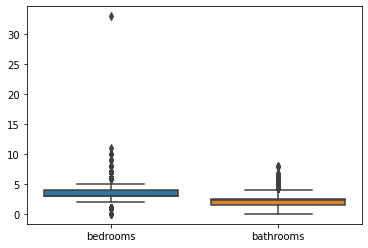

In [162]:
sns.boxplot(data=df[['bedrooms','bathrooms']])

***We can see that the data is in the range of 0 - 33 and not leaking out of boundries, and we can also notice that the bathrooms are also within the limits of 0-8.***

<AxesSubplot:>

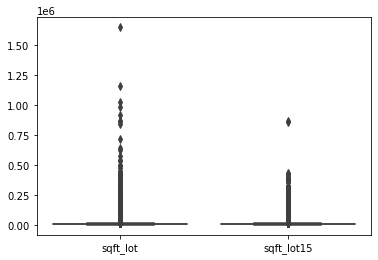

In [163]:
sns.boxplot(data=df[['sqft_lot', 'sqft_lot15']])

***Total area of size of lot in square feet in comapre to the average lot square footage of the 15 closest houses footage.***

<AxesSubplot:>

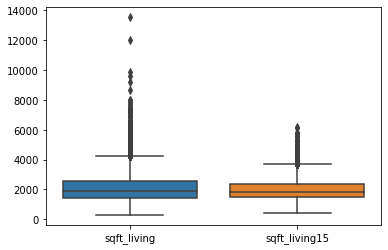

In [164]:
sns.boxplot(data=df[['sqft_living', 'sqft_living15']])

***Total area of size of house in square feet in comapre to the average house square footage of the 15 closest houses. we can also notice that the outliers are at the top side.***

<AxesSubplot:>

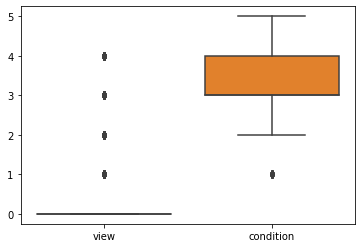

In [165]:
sns.boxplot(data=df[['view', 'condition']])

***We can see that most of the houses who are in condition between 3-4 are also the houses with the highest views.***

<AxesSubplot:>

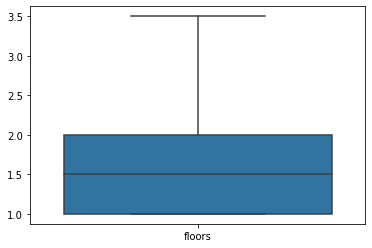

In [166]:
sns.boxplot(data=df[['floors']])

***We can notice that most houses are between 1-2 floors.***

<AxesSubplot:>

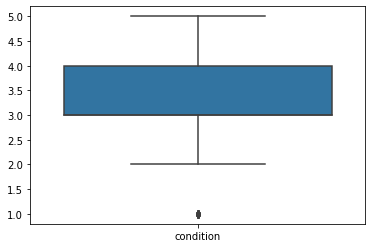

In [168]:
sns.boxplot(data=df[['condition']])

***We can notice that most houses are in good condition between 3-4 with otiliers which are in worse condition.***

<AxesSubplot:>

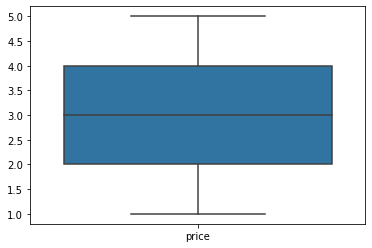

In [169]:
sns.boxplot(data=df[['price']])

***We can understand that most houses around the housing list area are listed around 2-4 with no outliers.***

<AxesSubplot:>

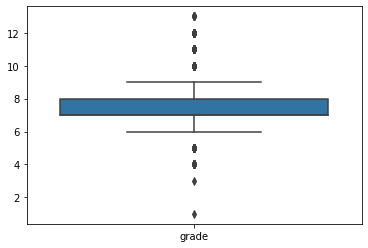

In [170]:
sns.boxplot(data=df[['grade']])

***we can understand that most of the houses are rated between 7 to 8. with quite similar outliers distibution on both sides of the plot***

In [171]:
# df['grade'].max()
df[df['grade'] > 12]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built/renovated
4411,5,5.0,5.75,9200,35069.0,2.0,0,0.0,3,13,6200.0,3000.0,98039,47.325450,-117.576277,3560.0,24345,2001.0
5451,5,4.0,3.25,4890,13402.0,2.0,0,0.0,3,13,4890.0,0.0,98059,47.759333,-120.168191,5790.0,13539,2004.0
6041,5,4.0,4.00,6330,13296.0,2.0,0,2.0,3,13,4900.0,1430.0,98033,48.017014,-118.878566,2200.0,9196,2000.0
7252,5,6.0,8.00,12050,27600.0,2.5,0,3.0,4,13,8570.0,3480.0,98102,47.417543,-118.967678,3940.0,8800,1987.0
7907,5,6.0,5.00,7100,18200.0,2.5,0,0.0,3,13,5240.0,1860.0,98199,47.446395,-117.980592,3130.0,6477,2002.0
9254,5,6.0,7.75,9890,31374.0,2.0,0,4.0,3,13,8860.0,1030.0,98039,47.572020,-118.278324,4540.0,42730,2001.0
10373,5,5.0,5.50,7400,18898.0,2.0,0,3.0,3,13,6290.0,1110.0,98006,47.683831,-119.472508,6110.0,26442,2001.0
13700,5,4.0,2.50,4500,35200.0,1.0,0,0.0,3,13,4500.0,0.0,98006,47.388353,-116.975613,4760.0,35200,1988.0
14556,5,5.0,6.25,8670,64033.0,2.0,0,4.0,3,13,6120.0,2550.0,98177,47.710461,-119.190640,4140.0,81021,2003.0


***We are able to see here that there are 9 rows with grade higher than the maximum grade available.
therefor i'm going to change them to 12.***

In [172]:
df['grade'] = np.where(df['grade'] > 12, 12, df['grade']) 

<ipython-input-172-b83f2ab12e6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'] = np.where(df['grade'] > 12, 12, df['grade'])


In [173]:
df[df['grade'] > 12]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built/renovated


<AxesSubplot:>

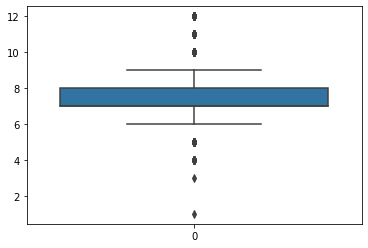

In [174]:
sns.boxplot(data=df['grade'])

***After replacing all of the outliers values with leagal once we can see that the boxplot values are all in range***

In [176]:
df.to_csv('housing_converted.csv')

### Summary:

- ***In this section i have done a few actoins and manipulations on the csv file.***


- ***at the beggining after opening the file, i have noticed that there are many rows who has NaN vlaues or empty cells. because of the fact that every one of this houses is differnet than the other, and because every detail about a house who's for sale must be accurate i had to drop lines who has missing details in order not to mistake on houses details.***
 
 
- ***The id's who came with the houses were also missing in part of the rows, therefore i decided to replace them with ascending order id's from 1 and up.this way i saved rows with missing id's from beeing deleted.***


- ***The date format was 20141013T000000	and from looking into the file i have noticed that all of the time column was set to T000000, due to that i replaced the time format to 2014-10-13.***


- ***On the next step i created boxplots of most of the features trying to find any mistakes or insights about the data.*** 


- ***on the bedroom and bathroom boxplot i have noticed that the data in the plot are in the bounds of the leagal data, and also that in the bethroom data the outliers are indicates on homes with more than 5 bathrooms. The bedroom data shows that there are outliers who indicates on houses with 0 rooms and more with more then 5.***


- ***on the sqft_living and sqft_living15 boxplot i have noticed that both average value was on 2000 but on the sqft_living data the outliers were much highers than those of the 15 closest houses.***


- ***on the sqft_lot and sqft_lot15 boxplot i have noticed that both average value was on 2000 but on the sqft_lot data the outliers were much highers than those of the 15 closest houses.***


- ***On the grade data the grade supposed to be between 0-12. in the boxplot i have noticed that there are outliers who are higher than 12.after checking for grades higher than 12 i found 9 rows with grade=13. after changing it back to 12 the boxplot was with valid values only.***



In [2]:
df = pd.read_csv('housing_converted.csv', index_col=0)



In [3]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built/renovated
0,1,3.0,1.00,1180,5650,1.0,0,0.0,3,7,1180.0,0.0,98178,47.467850,-118.442548,1340.0,5650,1955.0
1,3,3.0,2.25,2570,7242,2.0,0,0.0,3,7,2170.0,400.0,98125,47.739287,-118.556787,1690.0,7639,1991.0
2,1,2.0,1.00,770,10000,1.0,0,0.0,3,6,770.0,0.0,98028,47.576516,-119.427920,2720.0,8062,1933.0
3,4,4.0,3.00,1960,5000,1.0,0,0.0,5,7,1050.0,910.0,98136,47.520418,-118.599666,1360.0,5000,1965.0
4,3,3.0,2.00,1680,8080,1.0,0,0.0,3,8,1680.0,0.0,98074,47.717942,-118.418335,1800.0,7503,1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2,3.0,2.50,1530,1131,3.0,0,0.0,3,8,1530.0,0.0,98103,47.843378,-117.969003,1530.0,1509,2009.0
21609,3,4.0,2.50,2310,5813,2.0,0,0.0,3,8,2310.0,0.0,98146,47.748003,-117.697733,1830.0,7200,2014.0
21610,3,2.0,0.75,1020,1350,2.0,0,0.0,3,7,1020.0,0.0,98144,47.244265,-118.015665,1020.0,2007,2009.0
21611,3,3.0,2.50,1600,2388,2.0,0,0.0,3,8,1600.0,0.0,98027,47.561359,-117.640371,1410.0,1287,2004.0


In [4]:
corr = df.select_dtypes(np.number)
corrmatrix = corr.corr()
print(corrmatrix)


                       price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price               1.000000  0.325321   0.514738     0.638406  0.088964   
bedrooms            0.325321  1.000000   0.508460     0.570878  0.024942   
bathrooms           0.514738  0.508460   1.000000     0.756204  0.085369   
sqft_living         0.638406  0.570878   0.756204     1.000000  0.170562   
sqft_lot            0.088964  0.024942   0.085369     0.170562  1.000000   
floors              0.304291  0.177376   0.502144     0.356503 -0.005297   
waterfront          0.120134 -0.004450   0.063233     0.095821  0.010508   
view                0.301487  0.081154   0.188500     0.282126  0.071158   
condition           0.037093  0.026506  -0.127360    -0.061816 -0.012605   
grade               0.660900  0.355512   0.664756     0.759806  0.106110   
sqft_above          0.553989  0.473102   0.684596     0.875834  0.183415   
sqft_basement       0.285982  0.297362   0.285731     0.432898  0.010272   
zipcode     

***correlation of the dataset in textual way***

***in the heatmap below we can see the value of the correlation and this information gives us an idea of the strogest related features.***

***we can notice that the highest correlations which include the price features are:***

- sqft_living
- grade
- sqft_living15
- sqft_above
- bathrooms

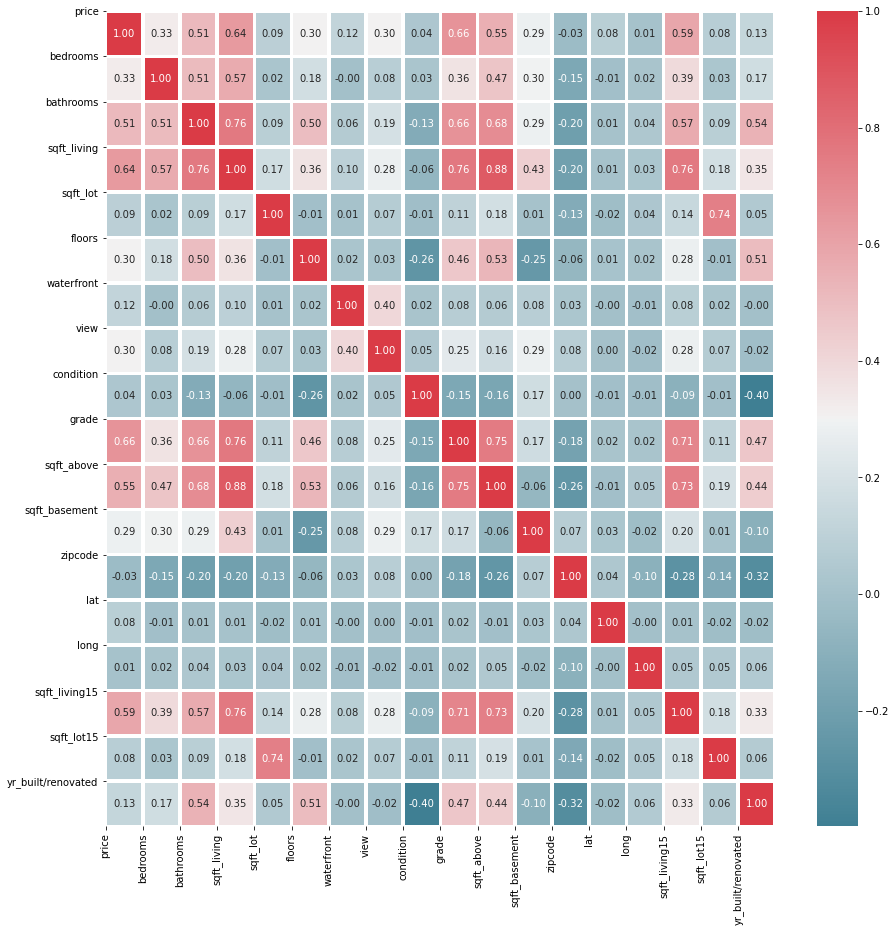

In [5]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", linewidths=2.5)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

****Feature Correlation****

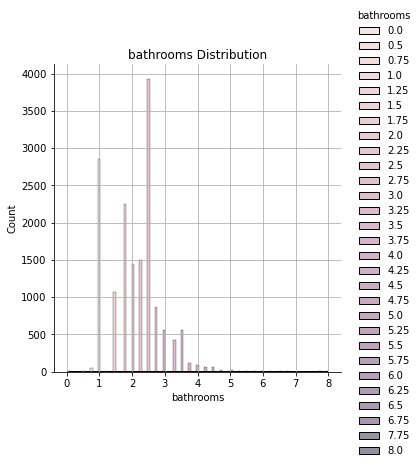

In [6]:
sns.displot(df, x="bathrooms", hue="bathrooms", height=5)
plt.title('bathrooms Distribution')
plt.grid(True) 
plt.show()

***in the plot above we can see that most houses listed with 2.5 bathrooms with a big gap between the second value which is 1 bathroom.***

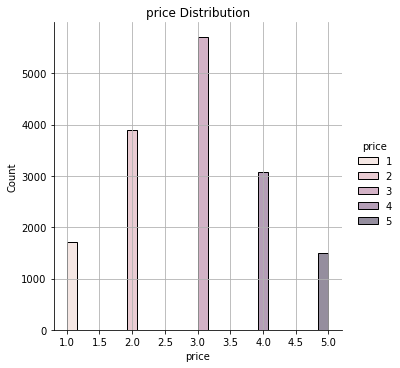

In [7]:
sns.displot(df, x="price", hue="price", height=5)
plt.title('price Distribution')
plt.grid(True) 
plt.show()

***according to this plot we can see that the prices are normally distributed with a price value 3 as the highest value of them.***

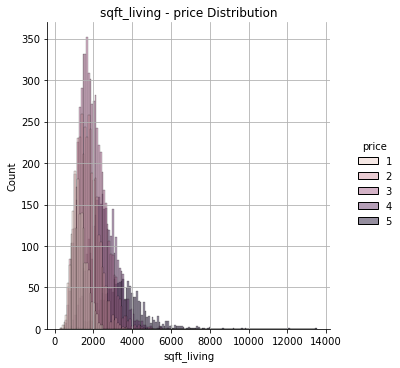

In [8]:
sns.displot(df, x="sqft_living", hue="price", height=5)
plt.title('sqft_living - price Distribution')
plt.grid(True) 
plt.show()

This plot shows us the relation between prices and sqft_living, and by the colors we can see darkest colors
integrate on higher prices and also hihger sqft_living. therfore we can assume that this two features are correlated.
We can also see that the more expensive the houses are, the amount of homes is decreasing.

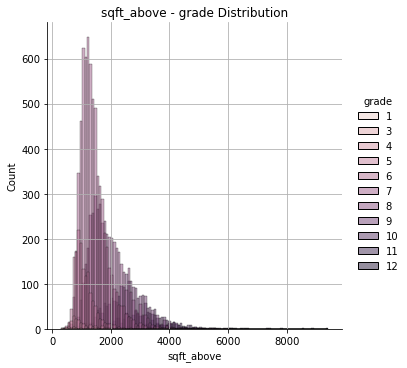

In [9]:
sns.displot(df, x="sqft_above", hue="grade", height=5)
plt.title('sqft_above - grade Distribution')
plt.grid(True) 
plt.show()


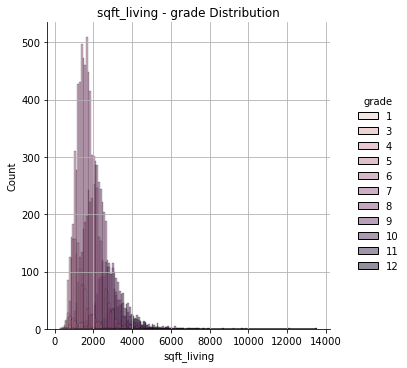

In [10]:
sns.displot(df, x="sqft_living", hue="grade", height=5)
plt.title('sqft_living - grade Distribution')
plt.grid(True) 
plt.show()

Similar to the previous plot we can notice that the bigger the houses the higher the grade and price. also here the hihgest values are for houses around 1500 to 3000 sqft. houses bigger than that are less listed.

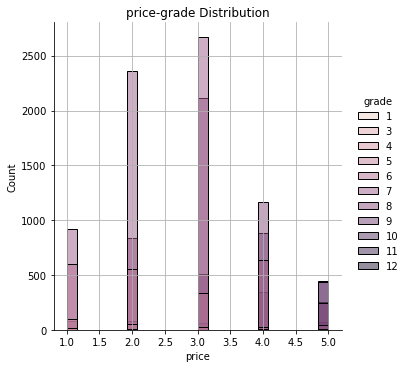

In [11]:
sns.displot(df, x="price", hue="grade", height=5)
plt.title('price-grade Distribution')
plt.grid(True) 
plt.show()

the plot above shows us the relatoin between grade and prices, by the lighter colors around the lower prices and the darker colors around the higher values we can understand that grade and prices are related to eachother.

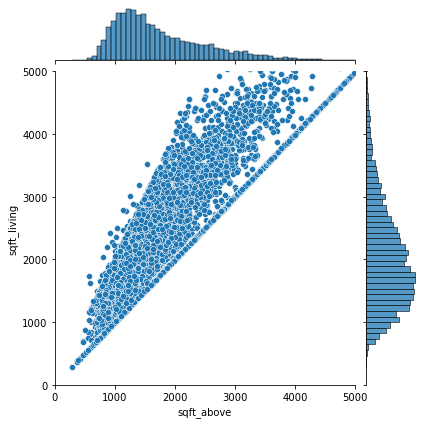

In [12]:
sns.jointplot(x='sqft_above', y='sqft_living', data=df, xlim=[0, 5000],ylim=[0,5000])


In this Jointplot above we can notice that we have a linear connection between sqft_living and sqft_above. 
Also we can notice that there is another case of houses with bigger sqft_living than the sqft_above and in that section we have a big distribution.

***NEGATIVE CORRELATION***

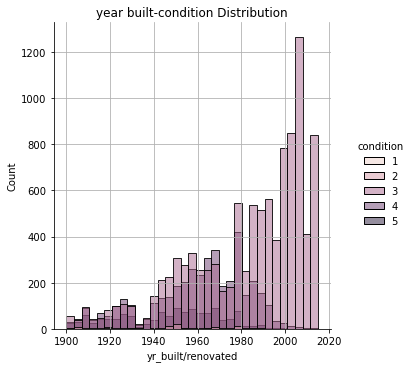

In [13]:
sns.displot(df, x="yr_built/renovated", hue="condition", height=5)
plt.title('year built-condition Distribution')
plt.grid(True) 
plt.show()

On the year built - condition plot above we can see that there is no relation between condition and year built.
we can see it according to the fact that the condition is distributed in a way we cannot predict, and not related to the year.

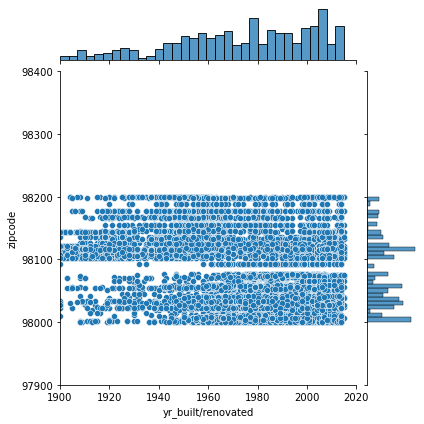

In [14]:
sns.jointplot(x='yr_built/renovated', y='zipcode', data=df, xlim=[1900, 2020],ylim=[97900,98400])


The plot above has negative correlation between year built and zipcode and we can only understand that all the houses listed were built from 1900 to 2015 in the rang of zipcodes 98000 to 98200. this information does not giving us the ability to analize the data.

***ANALYSIS OF EACH FEATURE***

Text(0.5, 1.0, 'Average squere feet per Category')

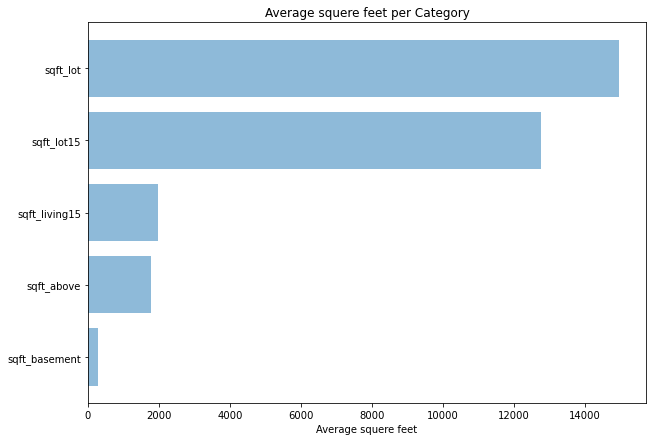

In [15]:
numericalFeatures = ['sqft_living', 'sqft_above',
       'sqft_lot','sqft_basement', 'sqft_living15',
       'sqft_lot15'] 
       
avrageRating = df[numericalFeatures[1:]].mean()
avrageRating = avrageRating.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(numericalFeatures[1:])), avrageRating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(numericalFeatures[1:])), avrageRating.index)
plt.xlabel('Average squere feet')
plt.title('Average squere feet per Category')

<AxesSubplot:xlabel='price'>

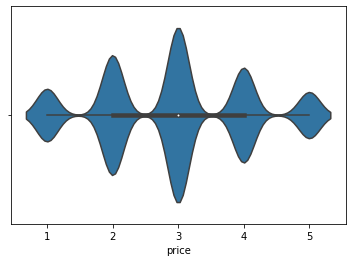

In [16]:

sns.violinplot(x='price', data=df)


According to the violin above we can see that the highest rate of houses listed are with price 3.
We can also see that there are more houses listed with price 2 than 4, and that diamonds 1 and 5 are quite similar.

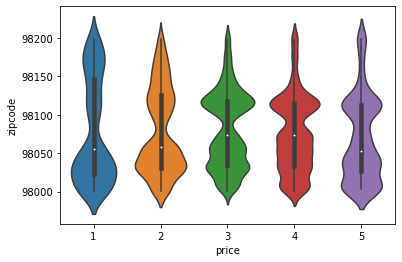

In [17]:
vp = sns.violinplot(x='price', y='zipcode', 
                    data=df)


In the violin plot above we can see that there are more houses listed with prices between zipcodes 98000 to 98050 and a smaller diamond between 98100 to 98150 in  houses listed with price 3 and higher.

also we can notice the even that the the amount of houses sold for the prices of 3 4 and 5 are not equal, the viloins diamonds are quite similar, and it related to the area of the houses by zipcodes.

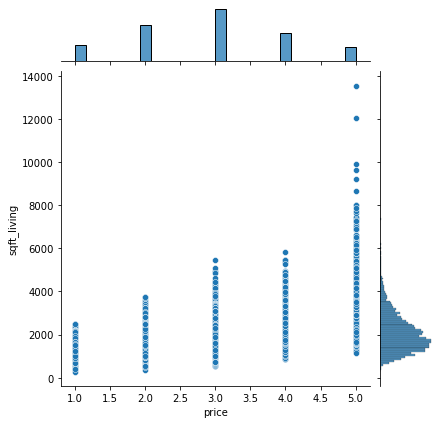

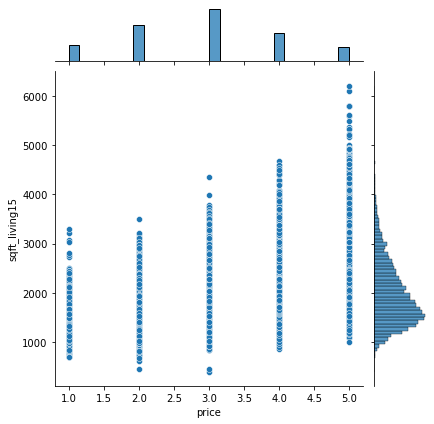

In [18]:
sns.jointplot(x='price', y='sqft_living', kind='scatter', data=df)
sns.jointplot(x='price', y='sqft_living15', kind='scatter', data=df)


***On the price - sqft_living joinplot above we can see that there is a connection between the sqft_living and the price of a house.
however, we can see that houses with sqft_living between 1000 to 4000 are sliced to all of the prices. 
this can tell us that houses from 4000 and north will have a higher price tag but the size of the house is not the only price factor.***

***On the price - sqft_living15 jointplot that the 15 closest houses related to the prices by a similar and that most of the 15 closest houses footage
were between 1500 to 2000 sqft_living***


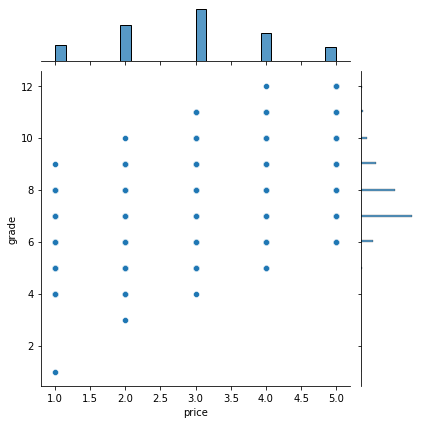

In [19]:
sns.jointplot(x='price', y='grade', kind='scatter', data=df)



 ***conclusion: in the price - grade jointplot above we can see that there is a direct connection between price and grade. the higher the grade of the house, the higher the price can get.***

***we can also understand by the side column(the line in the right side) of vlaue 7 that most houses graded at level 7 and they are listed for the price of 3.***

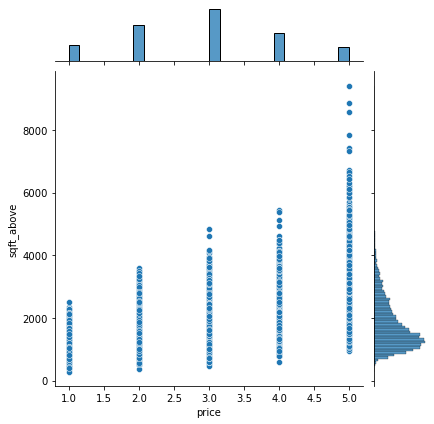

In [20]:
sns.jointplot(x='price', y='sqft_above', kind='scatter', data=df)


***On the price - sqft_above jointPlot above we can notice that there is a relation between sqft_above and home prices.
we can notice that most of the houses between 500 to 4000 are srpead all around the prices which mean that it is not the only 
value that influence the prices of houses. ***

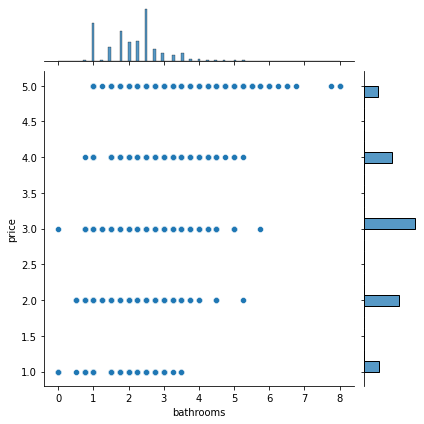

In [21]:
sns.jointplot(x='bathrooms', y='price', kind='scatter', data=df)


*** On the price - bathrooms jointPlot we can notice that there is a relation between price and bathrooms. 
we can see that houses with 0 and more bathrooms are located at price 1 
and on higher prices the amount of bathrooms starts at higher numbers. also we can see that the number of 
bathrooms goes up by the price with a outliers in prices 2 and 3 where we can see houses listed for lower amount of money for a bigger amount of bathrooms. ***

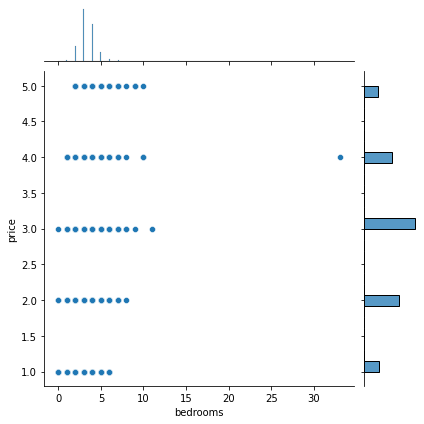

In [22]:
sns.jointplot(x='bedrooms', y='price', kind='scatter', data=df)


***In the price - bedrooms jointplot above, we can notice that we have a relation of price - bedrooms. the price of houses goes up with the growth of 
bedrooms in the house as long as bedrooms < 10 
we have an example here of a house with 33 bedrooms in it, but we can see that this amount of rooms doesnt related to the price.***

In [23]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built/renovated
0,1,3.0,1.00,1180,5650,1.0,0,0.0,3,7,1180.0,0.0,98178,47.467850,-118.442548,1340.0,5650,1955.0
1,3,3.0,2.25,2570,7242,2.0,0,0.0,3,7,2170.0,400.0,98125,47.739287,-118.556787,1690.0,7639,1991.0
2,1,2.0,1.00,770,10000,1.0,0,0.0,3,6,770.0,0.0,98028,47.576516,-119.427920,2720.0,8062,1933.0
3,4,4.0,3.00,1960,5000,1.0,0,0.0,5,7,1050.0,910.0,98136,47.520418,-118.599666,1360.0,5000,1965.0
4,3,3.0,2.00,1680,8080,1.0,0,0.0,3,8,1680.0,0.0,98074,47.717942,-118.418335,1800.0,7503,1987.0


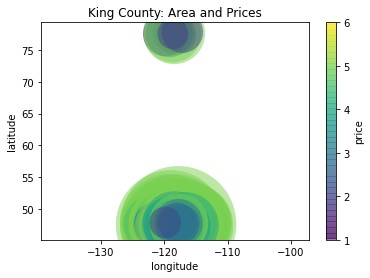

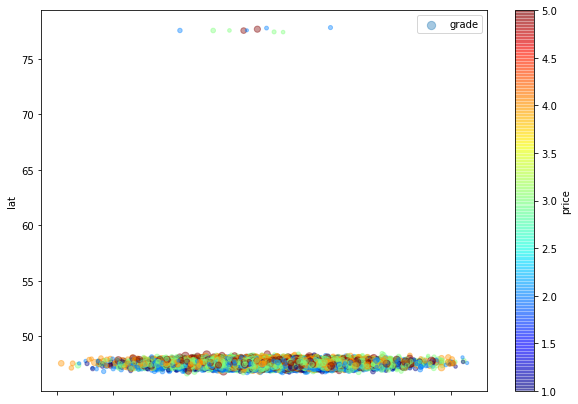

In [24]:


lat, lon = df['lat'], df['long']
price, area = df['price'], df['sqft_living']

plt.scatter(lon, lat, label=None,
            c=price, cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis("equal")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='price')
plt.clim(1, 6) #limit color scale to create better variation
plt.title('King County: Area and Prices')


df.plot(kind="scatter", x="long", y="lat",
    s=df['sqft_living']/100,label="grade", 
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

***The two plots above shows us that by the long/lat of the houses listed we can understand that there are two main areas of the houses where the souther one is king county and the norther one is seattle.***

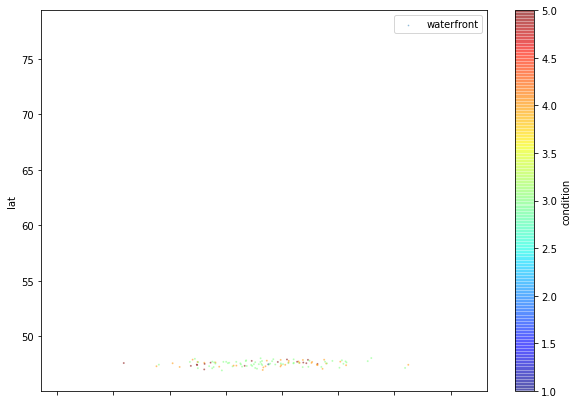

In [25]:

df.plot(kind="scatter", x="long", y="lat",
    s=df['waterfront'],label="waterfront", 
    c="condition", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

***int this plot we can see that all of the houses who has a waterfront are located in the souther area.***

In [26]:
sqft_living = pd.qcut(df['sqft_living'], 4)
sqft_above = pd.qcut(df['sqft_above'], 4)
pivot = df.pivot_table(index=[sqft_living, sqft_above], aggfunc={'price': 'mean'})
print(pivot.unstack())

                              price                                    \
sqft_above        (289.999, 1190.0] (1190.0, 1560.0] (1560.0, 2220.0]   
sqft_living                                                             
(289.999, 1430.0]          2.048827         2.206281              NaN   
(1430.0, 1910.0]           2.581325         2.619476         2.612539   
(1910.0, 2550.0]           2.807487         3.016393         3.056663   
(2550.0, 13540.0]          4.500000         3.393665         3.902571   

                                    
sqft_above        (2220.0, 9410.0]  
sqft_living                         
(289.999, 1430.0]              NaN  
(1430.0, 1910.0]               NaN  
(1910.0, 2550.0]          3.147624  
(2550.0, 13540.0]         4.014532  


***In the pivot table above we can see the prices of houses counted by sqft_living and sqft_above which they are strongly correalted.***

- ***we can see that houses priced 1 not exist for sqft_living greater than 289 and sqft_lot greater than 1560.***
- ***we can see that houses priced 2 not exist for sqft_living greater than 1430 and sqft_lot greater than 2220.***


# Classification Model

In [84]:
x_price = df.drop(['price'], axis=1)
y_price = df['price']

In [85]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x_price,y_price,random_state=1)

In [86]:
def bayes_plot(df, model="gnb", spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    sns.scatterplot(data=df, x=col1, y=col2, hue=target)
    plt.show()
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                            random_state=1)  # 80% training and 20% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)

    # Train Classifer

    prob = len(clf.classes_) == 2

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    hueorder = clf.classes_

    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                             np.arange(y_min, y_max, 1))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:
        Z = Z[:, 1] - Z[:, 0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0, len(clf.classes_) + 3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder, palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

In [87]:
def check_accuracy(features):
    X_weather = df.drop(['price', features[0], features[1] ], axis=1)
    y_weather = df['price']
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_weather, y_weather, test_size=0.2, random_state=1)
    model = GaussianNB()
    model.fit(Xtrain, ytrain)
    y_model = model.predict(Xtest)
    ypred = pd.Series(y_model, name='prediction')
    predicted = pd.concat([Xtest.reset_index(), ytest.reset_index(), ypred], axis=1)
    print(metrics.accuracy_score(ytest, y_model))
    predicted

In [88]:
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        print((df.columns[i], df.columns[j]))
        check_accuracy([df.columns[i], df.columns[j]])

('price', 'bedrooms')
0.379559748427673
('price', 'bathrooms')
0.37830188679245286
('price', 'sqft_living')
0.3864779874213837
('price', 'sqft_lot')
0.3877358490566038
('price', 'floors')
0.3776729559748428
('price', 'waterfront')
0.3767295597484277
('price', 'view')
0.37295597484276727
('price', 'condition')
0.37610062893081764
('price', 'grade')
0.37389937106918236
('price', 'sqft_above')
0.3949685534591195
('price', 'sqft_basement')
0.3742138364779874
('price', 'zipcode')
0.3745283018867924
('price', 'lat')
0.3805031446540881
('price', 'long')
0.37704402515723273
('price', 'sqft_living15')
0.38113207547169814
('price', 'sqft_lot15')
0.39025157232704405
('price', 'yr_built/renovated')
0.37484276729559746
('bedrooms', 'bathrooms')
0.3786163522012579
('bedrooms', 'sqft_living')
0.38930817610062896
('bedrooms', 'sqft_lot')
0.3889937106918239
('bedrooms', 'floors')
0.38207547169811323
('bedrooms', 'waterfront')
0.38018867924528305
('bedrooms', 'view')
0.37704402515723273
('bedrooms', 'co

***In the loop above i have searched for the lowest value which will tell me which two features missing will give me
the lowest result. after checking i found out that (price, bathrooms) gave me the lowest result.***

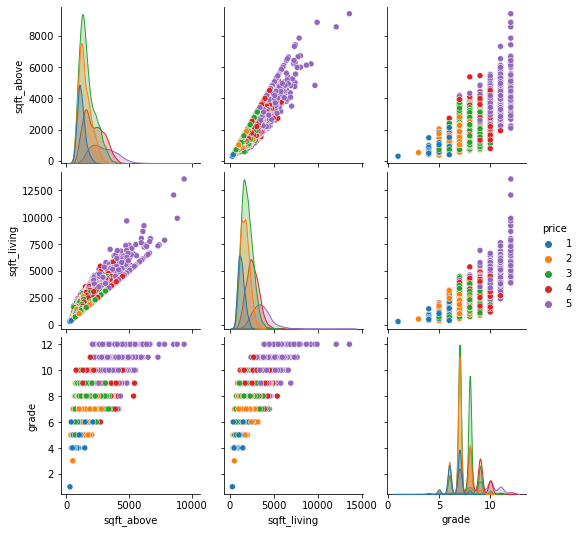

In [89]:
sns.pairplot(df[['price','sqft_above','sqft_living', 'grade']], hue='price', height=2.5, palette='tab10')
# sns.color_palette("tab10")


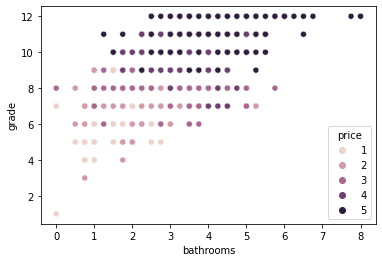

              precision    recall  f1-score   support

           1       0.42      0.39      0.41       351
           2       0.34      0.33      0.34       789
           3       0.43      0.54      0.48      1094
           4       0.48      0.36      0.41       614
           5       0.71      0.54      0.61       332

    accuracy                           0.44      3180
   macro avg       0.48      0.43      0.45      3180
weighted avg       0.45      0.44      0.44      3180



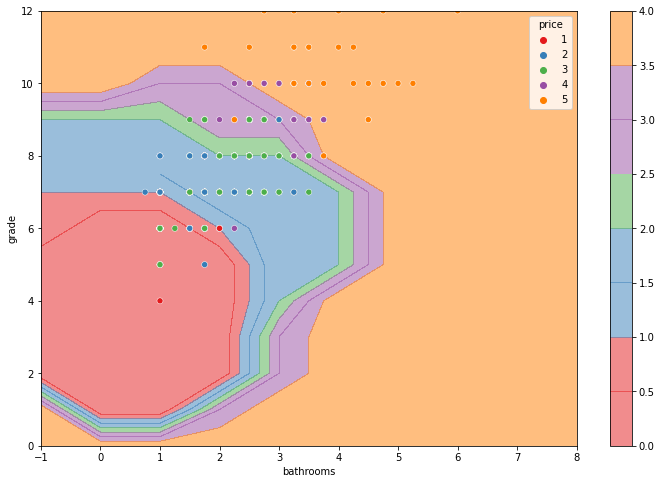

In [90]:
bayes_plot(df[['bathrooms','grade','price']])

***In the Naive base classifier we can see that we have got an accuracy of 0.44.
The colord area is spread by the values of price dependent on grade and price, and the colord circles are the
houses who arent where the should have been.***

# Decision Tree

In [ ]:
from io import StringIO
!conda install -y python-graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz

Feature: bedrooms, Score: 0.02191
Feature: bathrooms, Score: 0.04688
Feature: sqft_living, Score: 0.28020
Feature: sqft_lot, Score: 0.09777
Feature: floors, Score: 0.02348
Feature: waterfront, Score: 0.00009
Feature: view, Score: 0.01233
Feature: condition, Score: 0.04001
Feature: grade, Score: 0.34436
Feature: sqft_above, Score: 0.08569
Feature: sqft_basement, Score: 0.03930
Feature: yr_built, Score: 0.24722
Feature: yr_renovated, Score: 0.00359
Feature: zipcode, Score: 0.25964
Feature: lat, Score: 0.23090
Feature: long, Score: 0.06540
Feature: sqft_living15, Score: 0.16353
Feature: sqft_lot15, Score: 0.13432
18 []


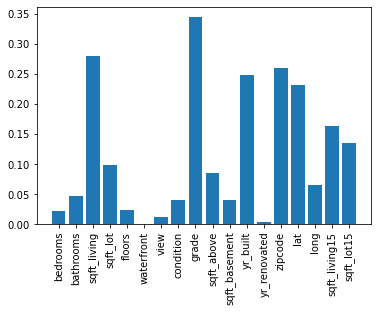

              precision    recall  f1-score   support

           1       0.51      0.47      0.49       453
           2       0.51      0.51      0.51      1032
           3       0.54      0.57      0.56      1406
           4       0.49      0.49      0.49       794
           5       0.65      0.58      0.61       402

    accuracy                           0.53      4087
   macro avg       0.54      0.53      0.53      4087
weighted avg       0.53      0.53      0.53      4087



In [114]:
house = pd.read_csv('housing2.csv')
house.dropna(inplace=True)
X = house.drop(["price","id","date"],axis=1)
y = house['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

result = permutation_importance(clf, X, y, n_repeats=10,random_state=0)
importance = zip(X.columns,result['importances_mean'])
# summarize feature importance
for i,v in importance:
    print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
print(len(X.columns),[x[1] for x in importance])
plt.bar(range(len(X.columns)), result['importances_mean'])
plt.xticks(ticks=range(len(X.columns)),labels=X.columns, rotation=90)
plt.show()

y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,feature_names=X.columns,class_names=clf.classes_)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('houses.png')
Image(graph.create_png())


***By looking at the plot avove we can get the idea of what are the most influencive feaures about the price we used the initiative data and only deleted rows who contains NaN and the output of the test is accuracy of 0.53.***
***This amount of accuracy is better than the accuracy that i have got from the bayes plot, and now i will check if by entering the features with most influence on the price and the cleaned data will improve the accuracy even more than 0.53.***

Feature: sqft_living, Score: 0.39572
Feature: yr_built/renovated, Score: 0.30447
Feature: grade, Score: 0.35442
Feature: zipcode, Score: 0.48761
4 []


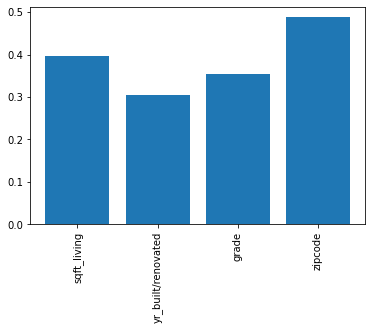

              precision    recall  f1-score   support

           1       0.55      0.56      0.55       515
           2       0.58      0.60      0.59      1160
           3       0.66      0.64      0.65      1702
           4       0.54      0.56      0.55       917
           5       0.67      0.67      0.67       475

    accuracy                           0.61      4769
   macro avg       0.60      0.60      0.60      4769
weighted avg       0.61      0.61      0.61      4769



In [179]:
house = pd.read_csv('housing_converted.csv')
# house.dropna(inplace=True)
X = house[["sqft_living","yr_built/renovated","grade", "zipcode"]]
y = house['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

result = permutation_importance(clf, X, y, n_repeats=10,random_state=0)
importance = zip(X.columns,result['importances_mean'])
# summarize feature importance
for i,v in importance:
    print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
print(len(X.columns),[x[1] for x in importance])
plt.bar(range(len(X.columns)), result['importances_mean'])
plt.xticks(ticks=range(len(X.columns)),labels=X.columns, rotation=90)
plt.show()

y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,feature_names=X.columns,class_names=clf.classes_)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('houses_converted.png')
Image(graph.create_png())

***In the plot above I decided to choose "sqft_living", "yr_built/renovated", "zipcode" and "grade" as the features who has the most influecne by looking at the plot above and by lookin at the correlation of features with price from the beggining of task 3.***

***My conclusion is that the features I chose are right for the prediction because now I have accuracy of 0.61 which is not a big approvement from the previous plot but in comparison with the bayes plot i have an improvement of 0.17.***

# Summary

### results:
- In task 3 i was able to understand a liitle better the correlation of price with other feature and also correlations between other features which helped me understand that i need to pay more attention to several features who contreibutes more than other features.
- When i tried to understand more about the influence of the lat long features i have noticed that there is a sepperation of the areas of the houses listed. most of them are at the lower side of the plot and a smaller part are at the top. by looking at google maps and searching after King County and Seattle i have noticed that the higher side represented seattle and most houses were listed at King County.
- By using the bayes classifaier against the decision tree plots, i have noticed that the better results came out of the tree and not the bayes classifier. by this result i can say that the bayes classifier mathces my dataset less then the decision tree.


### Issues:

- Geographic Data with Basemap - I tried to represent my lat/long data by using the Geographic Data with Basemap but unfortunately after a big search after guides, installatoins and tutorials it still didn't work. therefore i had to double check and understand if the lat/long that i have is actually based on King Counth and that the data will match the surface of this area.
